# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

# Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Captured in README file

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.options.display.max_seq_items = 2000
# pd.set_option('display.max_rows', None)
df = pd.read_csv('data/vehicles.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
l= df['manufacturer'].unique().tolist()
l.pop(0)
l.sort(reverse=True)
l

In [ ]:
print(df['manufacturer'].value_counts())
print(len(list(df['manufacturer'].value_counts())))
print(df['manufacturer'].isnull().sum())

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Missing Values

### 1. manufacturer and model

In [ ]:
df.query('manufacturer.isnull()', engine='python').query('model.notnull()', engine='python').head()

In [ ]:
df.query('manufacturer.isnull()', engine='python').query('model.notnull()', engine='python')['model'].value_counts()

In [ ]:
unique_models  = list(df.query('manufacturer.isnull()', engine='python').query('model.notnull()', engine='python')['model'].unique())
len(unique_models)
print(unique_models[:5])

In [ ]:
df_new = df.copy()

In [ ]:
df_new.query('manufacturer.isnull()', engine='python').query('model.notnull()', engine='python')['model'].value_counts()[:5]

In [ ]:
df_new.loc[df_new.model.str.contains('Scion',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'toyota'
df_new.loc[df_new.model.str.contains('Genesis',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('Freightliner',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('HUMMER',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('Honda',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'honda'
df_new.loc[df_new.model.str.contains('International',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'navistar'
df_new.loc[df_new.model.str.contains('WORKHORSE',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'navistar'
df_new.loc[df_new.model.str.contains('Suzuki',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'suzuki'
df_new.loc[df_new.model.str.contains('isuzu',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.contains('Maserati',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'stellantis'
df_new.loc[df_new.model.str.contains('volkswagen',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.contains('bentley',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.contains('SAAB',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.contains('Benz',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('STERLING',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('Polaris',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'polaris'
df_new.loc[df_new.model.str.contains('HOND',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'honda'
df_new.loc[df_new.model.str.contains('ROLLS',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'bmw'
df_new.loc[df_new.model.str.contains('plymouth',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'chrysler'
df_new.loc[df_new.model.str.contains('CHEV',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.contains('chry',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'chrysler'
df_new.loc[df_new.model.str.contains('toyo',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'toyota'
df_new.loc[df_new.model.str.contains('olet',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.contains('ford',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'ford'
df_new.loc[df_new.model.str.contains('smart',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'mercedes-benz'
df_new.loc[df_new.model.str.contains('hyndai',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'hyundai'
df_new.loc[df_new.model.str.contains('willys',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'chrysler'
df_new.loc[df_new.model.str.contains('wagen',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.contains('volkswagon',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.contains('volkswagon',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.contains('old',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.contains('triumph',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'leyland'
df_new.loc[df_new.model.str.contains('kenworth',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'paccar'
df_new.loc[df_new.model.str.contains('peterbilt',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'paccar'
df_new.loc[df_new.model.str.contains('mazda',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'toyota'
df_new.loc[df_new.model.str.contains('lamborghini',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'
df_new.loc[df_new.model.str.startswith('pon',na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'gmc'
df_new.loc[df_new.model.str.startswith('nis',na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'nissan'

In [ ]:
df_new = df_new.drop(df_new.query('manufacturer.isnull()', engine='python').index)
df_new = df_new.drop(df_new.query('model.isnull()', engine='python').index)

In [ ]:
unique_models  = list(df_new.query('manufacturer.isnull()', engine='python').query('model.notnull()', engine='python')['model'].unique())
len(unique_models)
print(unique_models[:5])

In [ ]:
df_new.to_csv('data/vehicles_1.csv')

***
***
***
***
***
***

### 2. VIN

In [ ]:
# df_new.loc[df_new.VIN.str.len()<17]

df_new = df_new.drop(df_new.query('VIN.str.len()<17', engine='python').index)

In [ ]:
# df_new.query('VIN.str.len()<17', engine='python')

In [ ]:
# vins = df["VIN"]
# vins.notnull() & vins.duplicated()

# df_new[df_new.duplicated(['VIN'], keep=False)]

In [ ]:
df_new.to_csv('data/vehicles_2.csv')
df_new.info()

***
***
***
***
***
***

### 3. year

In [ ]:
# df2 = df_new.copy()


print(df_new['year'].value_counts())
print(len(list(df_new['year'].value_counts())))
print(df_new['year'].isnull().sum())

In [ ]:
df_new['year'].unique()

In [ ]:
pd.set_option('display.max_rows', 10)

df_new.query('year.isnull()', engine='python')


In [ ]:
# df_new.loc[df_new.model.str.contains('lamborghini',case=False,na=False) & df_new.manufacturer.isnull(), 'manufacturer'] = 'volkswagen'

vins = df_new.query('year.isnull()', engine='python')['VIN'].unique().tolist()

year_lookup = {
    'J':2018,
    'K':2019,
    'L':2020,
    'M':2021
}

vin_codes =[]

for vin in vins:
    # print(vin[9])
    vin_codes.append(vin[9])
    # print(year_lookup[vin[9]])
    # print(vin)
    # print(df2.loc[df2.year.isnull() & df2.VIN.str.contains(vin)]['year'])
    # print(df2.VIN.str.contains(vin))
    df_new.loc[df_new.year.isnull() & df_new.VIN.str.contains(vin), 'year'] = year_lookup[vin[9]]
    

# x = np.array(vin_codes)
# print(np.unique(x))

In [ ]:
print(df_new['year'].isnull().sum())

In [ ]:
print(df_new['year'].value_counts())

In [ ]:
df_new.to_csv('data/vehicles_3.csv')  
df_new.info()

***
***
***
***
***
***

### 4. fuel

In [ ]:
# df2 = df_new.copy()
print(df_new['fuel'].value_counts())
print(len(list(df_new['fuel'].value_counts())))
print(df_new['fuel'].isnull().sum())

In [ ]:
# df_new.query('fuel=="other"', engine='python')

df_new = df_new.drop(df_new.query('fuel=="other"', engine='python').index)


In [ ]:
models = df_new.query('fuel.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['fuel'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.fuel.isnull() & df_new.model.str.contains(model), 'fuel'] = fuels[0]


In [ ]:
df_new.groupby('fuel')[['fuel']].count().plot()


In [ ]:
df_new['fuel'].fillna('gas', inplace=True)

In [ ]:
print(df_new['fuel'].value_counts())
print(len(list(df_new['fuel'].value_counts())))
print(df_new['fuel'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_4.csv')  
df_new.info()

***
***
***
***
***
***

### 5. transmission

In [ ]:
# df2 = df_new.copy()
print(df_new['transmission'].value_counts())
print(len(list(df_new['transmission'].value_counts())))
print(df_new['transmission'].isnull().sum())

In [ ]:
df_new = df_new.drop(df_new.query('transmission=="other"', engine='python').index)


In [ ]:
models = df_new.query('transmission.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['transmission'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.transmission.isnull() & df_new.model.str.contains(model), 'transmission'] = fuels[0]

In [ ]:
df_new.groupby('transmission')[['transmission']].count().plot()


In [ ]:
df_new['transmission'].fillna('automatic', inplace=True)

In [ ]:
print(df_new['transmission'].value_counts())
print(len(list(df_new['transmission'].value_counts())))
print(df_new['transmission'].isnull().sum())

In [ ]:
print(df_new['transmission'].value_counts())


In [ ]:
df_new.to_csv('data/vehicles_5.csv')  
df_new.info()

***
***
***
***
***
***

### 6. cylinders

In [ ]:
# df2 = df_new.copy()
print(df_new['cylinders'].value_counts())
print(len(list(df_new['cylinders'].value_counts())))
print(df_new['cylinders'].isnull().sum())

In [ ]:
df_new = df_new.drop(df_new.query('cylinders=="other"', engine='python').index)


In [ ]:
models = df_new.query('cylinders.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['cylinders'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.cylinders.isnull() & df_new.model.str.contains(model), 'cylinders'] = fuels[0]

In [ ]:
print(df_new['cylinders'].value_counts())
print(len(list(df_new['cylinders'].value_counts())))
print(df_new['cylinders'].isnull().sum())

In [ ]:
# df2 = df_new.copy()

# df_new.groupby('cylinders')[['cylinders']].count()
df_new.groupby('cylinders')[['cylinders']].count().plot()
plt.xticks(rotation = 45)

In [ ]:
df_new.query('cylinders.isnull()', engine='python')

In [ ]:
pd.set_option('display.max_rows', 600)

df_new.groupby(['cylinders','year'])[['year']].count().plot()
plt.xticks(rotation = 45)

In [ ]:
df_new.loc[(df_new.cylinders.isnull()) & (df_new.year<= 1972.0), 'cylinders'] = '4 cylinders'
df_new.loc[(df_new.cylinders.isnull()) & (df_new.year> 1972.0) & (df_new.year<=1984.0), 'cylinders'] = '6 cylinders'
df_new.loc[(df_new.cylinders.isnull()) & (df_new.year>1984.0), 'cylinders'] = '8 cylinders'

In [ ]:
print(df_new['cylinders'].value_counts())
# print(len(list(df_new['cylinders'].value_counts())))
print(df_new['cylinders'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_6.csv')  
df_new.info()

***
***
***
***
***
***

### 7. drive

In [ ]:
# df2 = df_new.copy()
print(df_new['drive'].value_counts())
print(len(list(df_new['drive'].value_counts())))
print(df_new['drive'].isnull().sum())

In [ ]:
df_new['drive'] = df_new['drive'].str.replace("fwd","2wd")
df_new['drive'] = df_new['drive'].str.replace("rwd","2wd")

In [ ]:
models = df_new.query('drive.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['drive'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.drive.isnull() & df_new.model.str.contains(model), 'drive'] = fuels[0]

In [ ]:
print(df_new['drive'].value_counts())
print(len(list(df_new['drive'].value_counts())))
print(df_new['drive'].isnull().sum())

In [ ]:
df_new.groupby('drive')[['drive']].count().plot()


In [ ]:
models = df_new.query('drive.isnull()', engine='python')['type'].unique().tolist()
# len(models)
models.pop(0)
models

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.type.str.contains(model, na=False)]['drive'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.drive.isnull() & df_new.type.str.contains(model), 'drive'] = fuels[0]

In [ ]:
print(df_new['drive'].value_counts())
print(len(list(df_new['drive'].value_counts())))
print(df_new['drive'].isnull().sum())

In [ ]:
df_new.query('drive.isnull()', engine='python')

In [ ]:
models = df_new.query('drive.isnull()', engine='python')['cylinders'].unique().tolist()
# len(models)
# models.pop(3)
models

In [ ]:
for model in models:
    fuels = df_new.loc[df_new.cylinders.str.contains(model, na=False)]['drive'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.drive.isnull() & df_new.cylinders.str.contains(model), 'drive'] = fuels[0]

In [ ]:
print(df_new['drive'].value_counts())
print(len(list(df_new['drive'].value_counts())))
print(df_new['drive'].isnull().sum())

In [ ]:
df_new['drive'].fillna('fwd', inplace=True)

# df_new['fuel'].fillna('gas', inplace=True)

In [ ]:
print(df_new['drive'].value_counts())
print(len(list(df_new['drive'].value_counts())))
print(df_new['drive'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_7.csv')
df_new.info()

***
***
***
***
***
***

### 8. type

In [ ]:
print(df_new['type'].value_counts())
print(len(list(df_new['type'].value_counts())))
print(df_new['type'].isnull().sum())

In [ ]:
df_new = df_new.drop(df_new.query('type=="other"', engine='python').index)


In [ ]:
models = df_new.query('type.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
# df2  =  df_new.copy()
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['type'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new.type.isnull() & df_new.model.str.contains(model), 'type'] = fuels[0]

In [ ]:
print(df_new['type'].value_counts())
print(len(list(df_new['type'].value_counts())))
print(df_new['type'].isnull().sum())

In [ ]:
df_new.query('type.isnull()', engine='python')

In [ ]:
df_new = df_new.drop(df_new.query('type.isnull()', engine='python').index)

In [ ]:
print(df_new['type'].value_counts())
print(len(list(df_new['type'].value_counts())))
print(df_new['type'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_8.csv')
df_new.info()

***
***
***
***
***
***

### 9. Size

In [ ]:
print(df_new['size'].value_counts())
print(len(list(df_new['size'].value_counts())))
print(df_new['size'].isnull().sum())

In [ ]:
models = df_new.query('size.isnull()', engine='python')['model'].unique().tolist()
len(models)

In [ ]:
# df2  =  df_new.copy()
for model in models:
    fuels = df_new.loc[df_new.model.str.contains(model)]['size'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new['size'].isnull() & df_new.model.str.contains(model), 'size'] = fuels[0]

In [ ]:
print(df_new['size'].value_counts())
print(len(list(df_new['size'].value_counts())))
print(df_new['size'].isnull().sum())

In [ ]:
models = df_new.query('size.isnull()', engine='python')['type'].unique().tolist()
len(models)

In [ ]:
# df2  =  df_new.copy()
for model in models:
    fuels = df_new.loc[df_new['type'].str.contains(model)]['size'].tolist()
    if len(fuels)>0:
        df_new.loc[df_new['size'].isnull() & df_new['type'].str.contains(model), 'size'] = fuels[0]

In [ ]:
print(df_new['size'].value_counts())
print(len(list(df_new['size'].value_counts())))
print(df_new['size'].isnull().sum())

In [ ]:
df_new.query('size.isnull()', engine='python').head()

In [ ]:
df_new.groupby(['cylinders','size'])[['size']].count()

In [ ]:
df2  =  df_new.copy()


size_lookup = {
    '10 cylinders':'full-size',
    '12 cylinders':'full-size',
    '3 cylinders':'compact',
    '4 cylinders':'mid-size',
    '5 cylinders':'mid-size',
    '6 cylinders':'mid-size',
    '8 cylinders':'mid-size',
    'other':'full-size'
}

cyls = df_new.query('size.isnull()', engine='python')['cylinders'].unique().tolist()

for cyl in cyls:
    # print(vin[9])
    # vin_codes.append(vin[9])
    # print(year_lookup[vin[9]])
    # print(vin)
    # print(df2.loc[df2.year.isnull() & df2.VIN.str.contains(vin)]['year'])
    # print(df2.VIN.str.contains(vin))
    df_new.loc[df_new['size'].isnull() & df_new.cylinders.str.contains(cyl), 'size'] = size_lookup[cyl]


In [ ]:
print(df_new['size'].value_counts())
print(len(list(df_new['size'].value_counts())))
print(df_new['size'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_9.csv')
df_new.info()

***
***
***
***
***
***

### 10. condition

In [ ]:
print(df_new['condition'].value_counts())


In [ ]:
df_new['condition'].fillna('fair', inplace=True)

In [ ]:
print(df_new['condition'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_10.csv')
df_new.info()

***
***
***
***
***
***

### 11. title_status

In [ ]:
print(df_new['title_status'].value_counts())


In [ ]:
df_new['title_status'].fillna('rebuilt', inplace=True)

In [ ]:
print(df_new['title_status'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_11.csv')
df_new.info()

***
***
***
***
***
***

### 12. paint_color

In [ ]:
print(df_new['paint_color'].value_counts())

In [ ]:
print(df_new['paint_color'].isnull().sum())

In [ ]:
df_new['paint_color'].fillna('grey', inplace=True)

In [ ]:
df_new.to_csv('data/vehicles_12.csv')
df_new.info()

***
***
***
***
***
***

### 13. odometer

In [ ]:
print(df_new['odometer'].value_counts())

In [ ]:
df_new.loc[df_new['odometer'] > 9_999_999]
df_new = df_new.drop(df_new.query('odometer>9_999_999', engine='python').index)

In [ ]:
print(df_new['odometer'].value_counts())
print(len(list(df_new['odometer'].value_counts())))
print(df_new['odometer'].isnull().sum())

In [ ]:
df_new['odometer'] = df_new['odometer'].fillna(df_new['odometer'].mean())

In [ ]:
print(df_new['odometer'].value_counts())
print(len(list(df_new['odometer'].value_counts())))
print(df_new['odometer'].isnull().sum())

In [ ]:
df_new.to_csv('data/vehicles_13.csv')
df_new.info()

### 14. price

In [ ]:
df_new=pd.read_csv('data/vehicles_13.csv')

In [ ]:
print(df_new['price'].value_counts())
print(len(list(df_new['price'].value_counts())))
print(df_new['price'].isnull().sum())

In [ ]:
df_new = df_new.drop(df_new.loc[df_new['price'].astype(str).str.len()>6].index)
# df_new.loc[df_new['price'].astype(str).str.len()>6].index

In [ ]:
# df_new.loc[(df_new['price']==0)].index
df_new = df_new.drop(df_new.loc[df_new['price']==0].index)

# df_new.loc[(df_new['price']==0) & (df_new['condition']!='salvage')].index


In [ ]:
df_new['price'] = df_new['price'].fillna(df_new['price'].mean())

In [ ]:
df_new.to_csv('data/vehicles_14.csv')
df_new.info()

In [ ]:
del df_new['Unnamed: 0']

***
***
***
***
***
***

### Taking backup

In [ ]:
df_new.to_csv('data/vehicles_new.csv')  

## Dropping and combining

In [ ]:
df_new = pd.read_csv('data/vehicles_new.csv')  
df_new.head()
del df_new['Unnamed: 0']
df_new.head()


In [ ]:
df_clean = df_new.copy()

### VIN

Dropping VIN as its just vehicle identification

In [ ]:
df_clean = df_clean.drop(['VIN'], axis = 1)

### id

Dropping id as its just row identifier

In [ ]:
df_clean = df_clean.drop(['id'], axis = 1)

### Model

Dropping model as the column values have lot of redundant information.

In [ ]:
df_clean = df_clean.drop(['model'], axis = 1)

### size

Dropping size as the column is redundant w.r.t type

In [ ]:
df_clean = df_clean.drop(['size'], axis = 1)

### state n region

To reduce the number of cols generated out of region n state columns, we will categorize the location under US regions below

South        
West         
Midwest      
Northeast     

#### Pull in state to region mapping.

In [ ]:
df_state = pd.read_csv('data/states.csv')

In [ ]:
df_state.info()

In [ ]:
df_state.head()

In [ ]:
state_list =  df_state['State Code'].str.lower().value_counts().index.tolist()
# state_list

In [ ]:
data = {}
for state in state_list:
    # print(df_state.loc[df_state['State Code'].str.lower() == state]['Region'].tolist()[0])
    region = df_state.loc[df_state['State Code'].str.lower() == state]['Region'].tolist()[0]
    data[state] = region


In [ ]:
for state in state_list:
    # print(vin[9])
    # vin_codes.append(vin[9])
    # print(year_lookup[vin[9]])
    # print(vin)
    # print(df2.loc[df2.year.isnull() & df2.VIN.str.contains(vin)]['year'])
    # print(df2.VIN.str.contains(vin))
    df_clean.loc[df_clean.state.str.contains(state), 'region'] = data[state]

In [ ]:
df_clean.head()

In [ ]:
df_clean['region'].value_counts()

In [ ]:
df_clean = df_clean.drop(['state'], axis = 1)

In [ ]:
df_clean.info()

In [ ]:
df_clean.head()

In [ ]:
df_clean.to_csv('data/vehicles_clean.csv')  

## Visualize

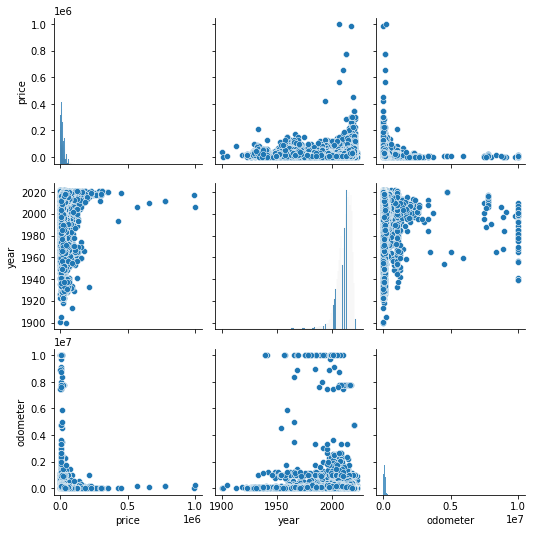

In [408]:
sns.pairplot(df_clean)

### correlation

[Text(0.5, 0, 'price'), Text(1.5, 0, 'year'), Text(2.5, 0, 'odometer')]

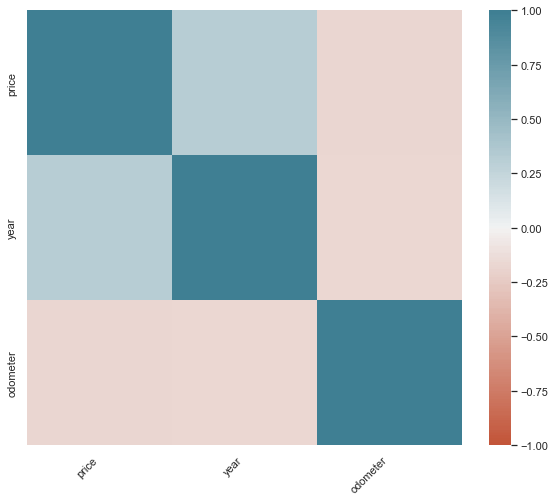

In [409]:
corr = df_clean.corr()
# display(corr)
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

### manufacturer vs price

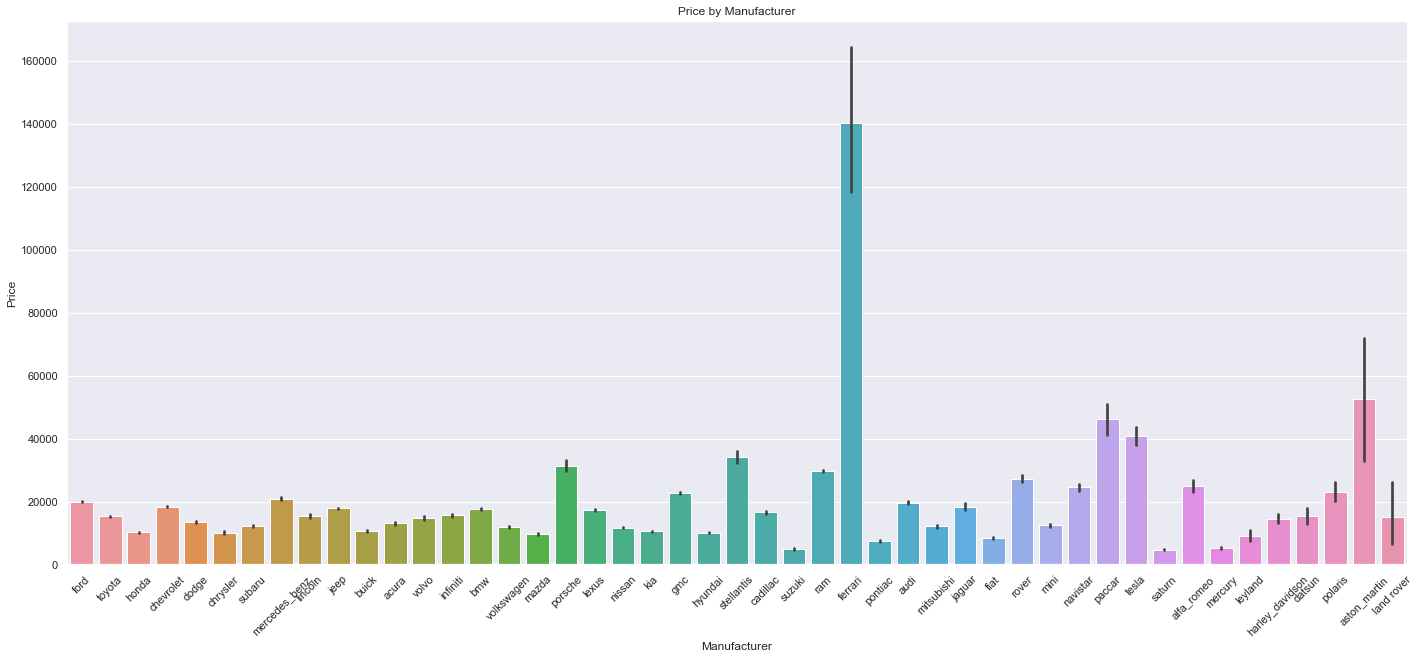

In [410]:
plt.subplots(figsize=(24,10))
sns.barplot( data=df_clean, x='manufacturer', y='price' )
plt.title('Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

### drive vs price

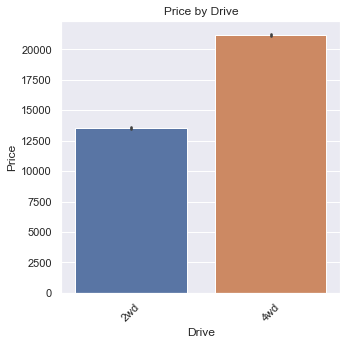

In [411]:
plt.subplots(figsize=(5,5))
sns.barplot( data=df_clean, x='drive', y='price' )
plt.title('Price by Drive')
plt.xlabel('Drive')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

### cylinders vs price

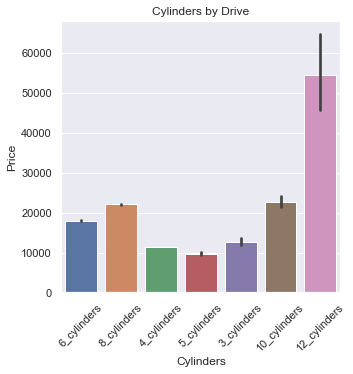

In [412]:
plt.subplots(figsize=(5,5))
sns.barplot( data=df_clean, x='cylinders', y='price' )
plt.title('Cylinders by Drive')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

### price distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

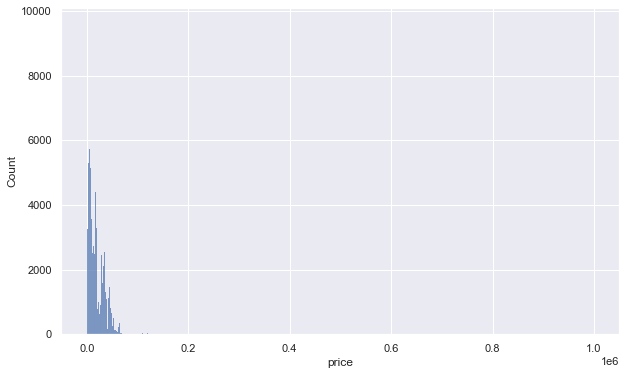

In [413]:
plt.subplots(figsize=(10,6))
sns.histplot(df_clean['price'])

### price by region

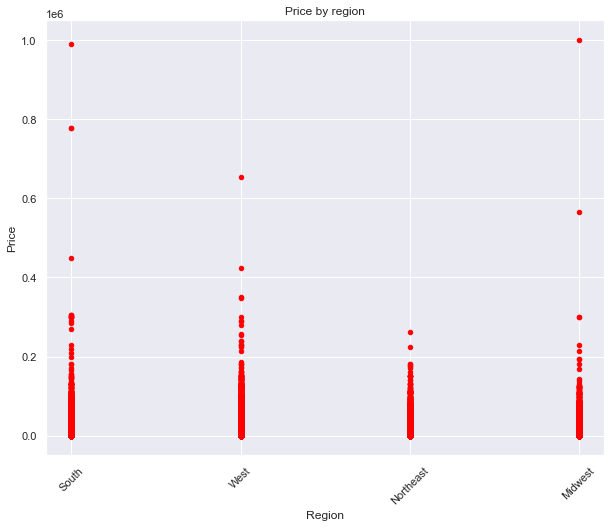

In [415]:
# sns.histplot(df_clean['condition'])

df_clean.plot(kind='scatter',x='region',y='price',color='red')
plt.figsize=(30,15)
plt.title('Price by region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation = 45)
plt.show()

## Special Characters

In [ ]:
df_clean= pd.read_csv('data/vehicles_clean.csv')  
del df_clean['Unnamed: 0']
df_clean.head()

In [ ]:
df_clean['manufacturer'].value_counts()

In [ ]:
df_clean['manufacturer'] = df_clean['manufacturer'].str.replace("-","_")

In [ ]:
df_clean['condition'].value_counts()

In [ ]:
df_clean['condition'] = df_clean['condition'].str.replace(" ","_")

In [ ]:
df_clean['cylinders'].value_counts()

In [ ]:
df_clean['cylinders'] = df_clean['cylinders'].str.replace(" ","_")

In [ ]:
df_clean['title_status'].value_counts()

In [ ]:
df_clean['title_status'] = df_clean['title_status'].str.replace(" ","_")

In [ ]:
df_clean.info()

### Taking backup

In [ ]:
df_clean.to_csv('data/vehicles_clean.csv')  

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [396]:
df_model = pd.read_csv('data/vehicles_clean.csv')
del df_model['Unnamed: 0']
df_model.head()

model_comp = {
    'model':['ridge_ohe','ridge_ohe_gcv','linreg_ohe','bay_ohe','rf_ohe'],
    'train_mse':[],
    'test_mse':[],
    'top_features_1':[],
    'top_features_score_1':[],
    'top_features_2':[],
    'top_features_score_2':[],
    'top_features_3':[],
    'top_features_score_3':[],
    'top_features_4':[],
    'top_features_score_4':[],
    'top_features_5':[],
    'top_features_score_5':[],
}

## Ridge with OHE

### multi-alpha

In [263]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [264]:
train_mses_ridge=[]
test_mses_ridge=[]
importances_mean_ridge = []

#Creating list of aphas to run Ridge regression
alphas = [.01,.1,1,10,100]
data = {'feature':list(X.columns)}

features = list(X.select_dtypes(include=['object']).columns)
features
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

In [265]:
for alpha in alphas:
    pipe = Pipeline([
    ('transformer', ohe_step),    
    ('scale',StandardScaler(with_mean=False)), 
    ('ridge', Ridge(alpha = alpha))])
    model = pipe.fit(X_train, y_train)
    train_mses_ridge.append(mean_squared_error(y_train, pipe.predict(X_train)))
    test_mses_ridge.append(mean_squared_error(y_test, pipe.predict(X_test)))
    r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 123)
    print(r.importances_mean)
    # importances_mean_ridge.append(r.importances_mean)
    data['coef_for_alpha_'+str(alpha)] = r.importances_mean
    # pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)
    # data['coef_for_alpha_'+str(alpha)] = pipe.named_steps['ridge'].coef_

[0.0151608  0.20674298 0.05891691 0.01619038 0.04788434 0.08909371
 0.03209362 0.00485518 0.00271614 0.01774837 0.06635689 0.00723776]
[0.0151608  0.20674283 0.05891689 0.01619038 0.04788432 0.08909369
 0.03209361 0.00485518 0.00271613 0.01774837 0.06635687 0.00723776]
[0.01516078 0.20674135 0.05891672 0.01619043 0.04788411 0.08909355
 0.03209359 0.00485515 0.00271607 0.01774837 0.06635666 0.00723777]
[0.0151606  0.20672658 0.058915   0.01619092 0.04788207 0.08909206
 0.03209339 0.00485484 0.00271545 0.01774838 0.0663546  0.0072379 ]
[0.01515877 0.20657901 0.0588978  0.01619583 0.04786162 0.08907721
 0.03209138 0.00485179 0.00270928 0.01774853 0.06633403 0.00723917]


In [266]:
train_mses_ridge

[135824744.05983534,
 135824744.05984944,
 135824744.06127173,
 135824744.2034483,
 135824758.4051221]

In [267]:
test_mses_ridge

[156190345.9489356,
 156190345.19910553,
 156190337.70211247,
 156190262.86268148,
 156189527.50273928]

In [268]:
alphas

[0.01, 0.1, 1, 10, 100]

In [269]:
data2 = {}
data2['alphas'] = alphas
data2['train_mses'] = train_mses_ridge
data2['test_mses'] = test_mses_ridge
alpha_df2= pd.DataFrame(data2)
alpha_df2

,alphas,train_mses,test_mses
0,0.01,1.358247e+08,1.561903e+08
1,0.10,1.358247e+08,1.561903e+08
2,1.00,1.358247e+08,1.561903e+08
3,10.00,1.358247e+08,1.561903e+08
4,100.00,1.358248e+08,1.561895e+08


In [270]:
alpha_df= pd.DataFrame(data)
alpha_df

,feature,coef_for_alpha_0.01,coef_for_alpha_0.1,coef_for_alpha_1,coef_for_alpha_10,coef_for_alpha_100
0,region,0.015161,0.015161,0.015161,0.015161,0.015159
1,year,0.206743,0.206743,0.206741,0.206727,0.206579
2,manufacturer,0.058917,0.058917,0.058917,0.058915,0.058898
3,condition,0.016190,0.016190,0.016190,0.016191,0.016196
4,cylinders,0.047884,0.047884,0.047884,0.047882,0.047862
5,fuel,0.089094,0.089094,0.089094,0.089092,0.089077
6,odometer,0.032094,0.032094,0.032094,0.032093,0.032091
7,title_status,0.004855,0.004855,0.004855,0.004855,0.004852
8,transmission,0.002716,0.002716,0.002716,0.002715,0.002709
9,drive,0.017748,0.017748,0.017748,0.017748,0.017749


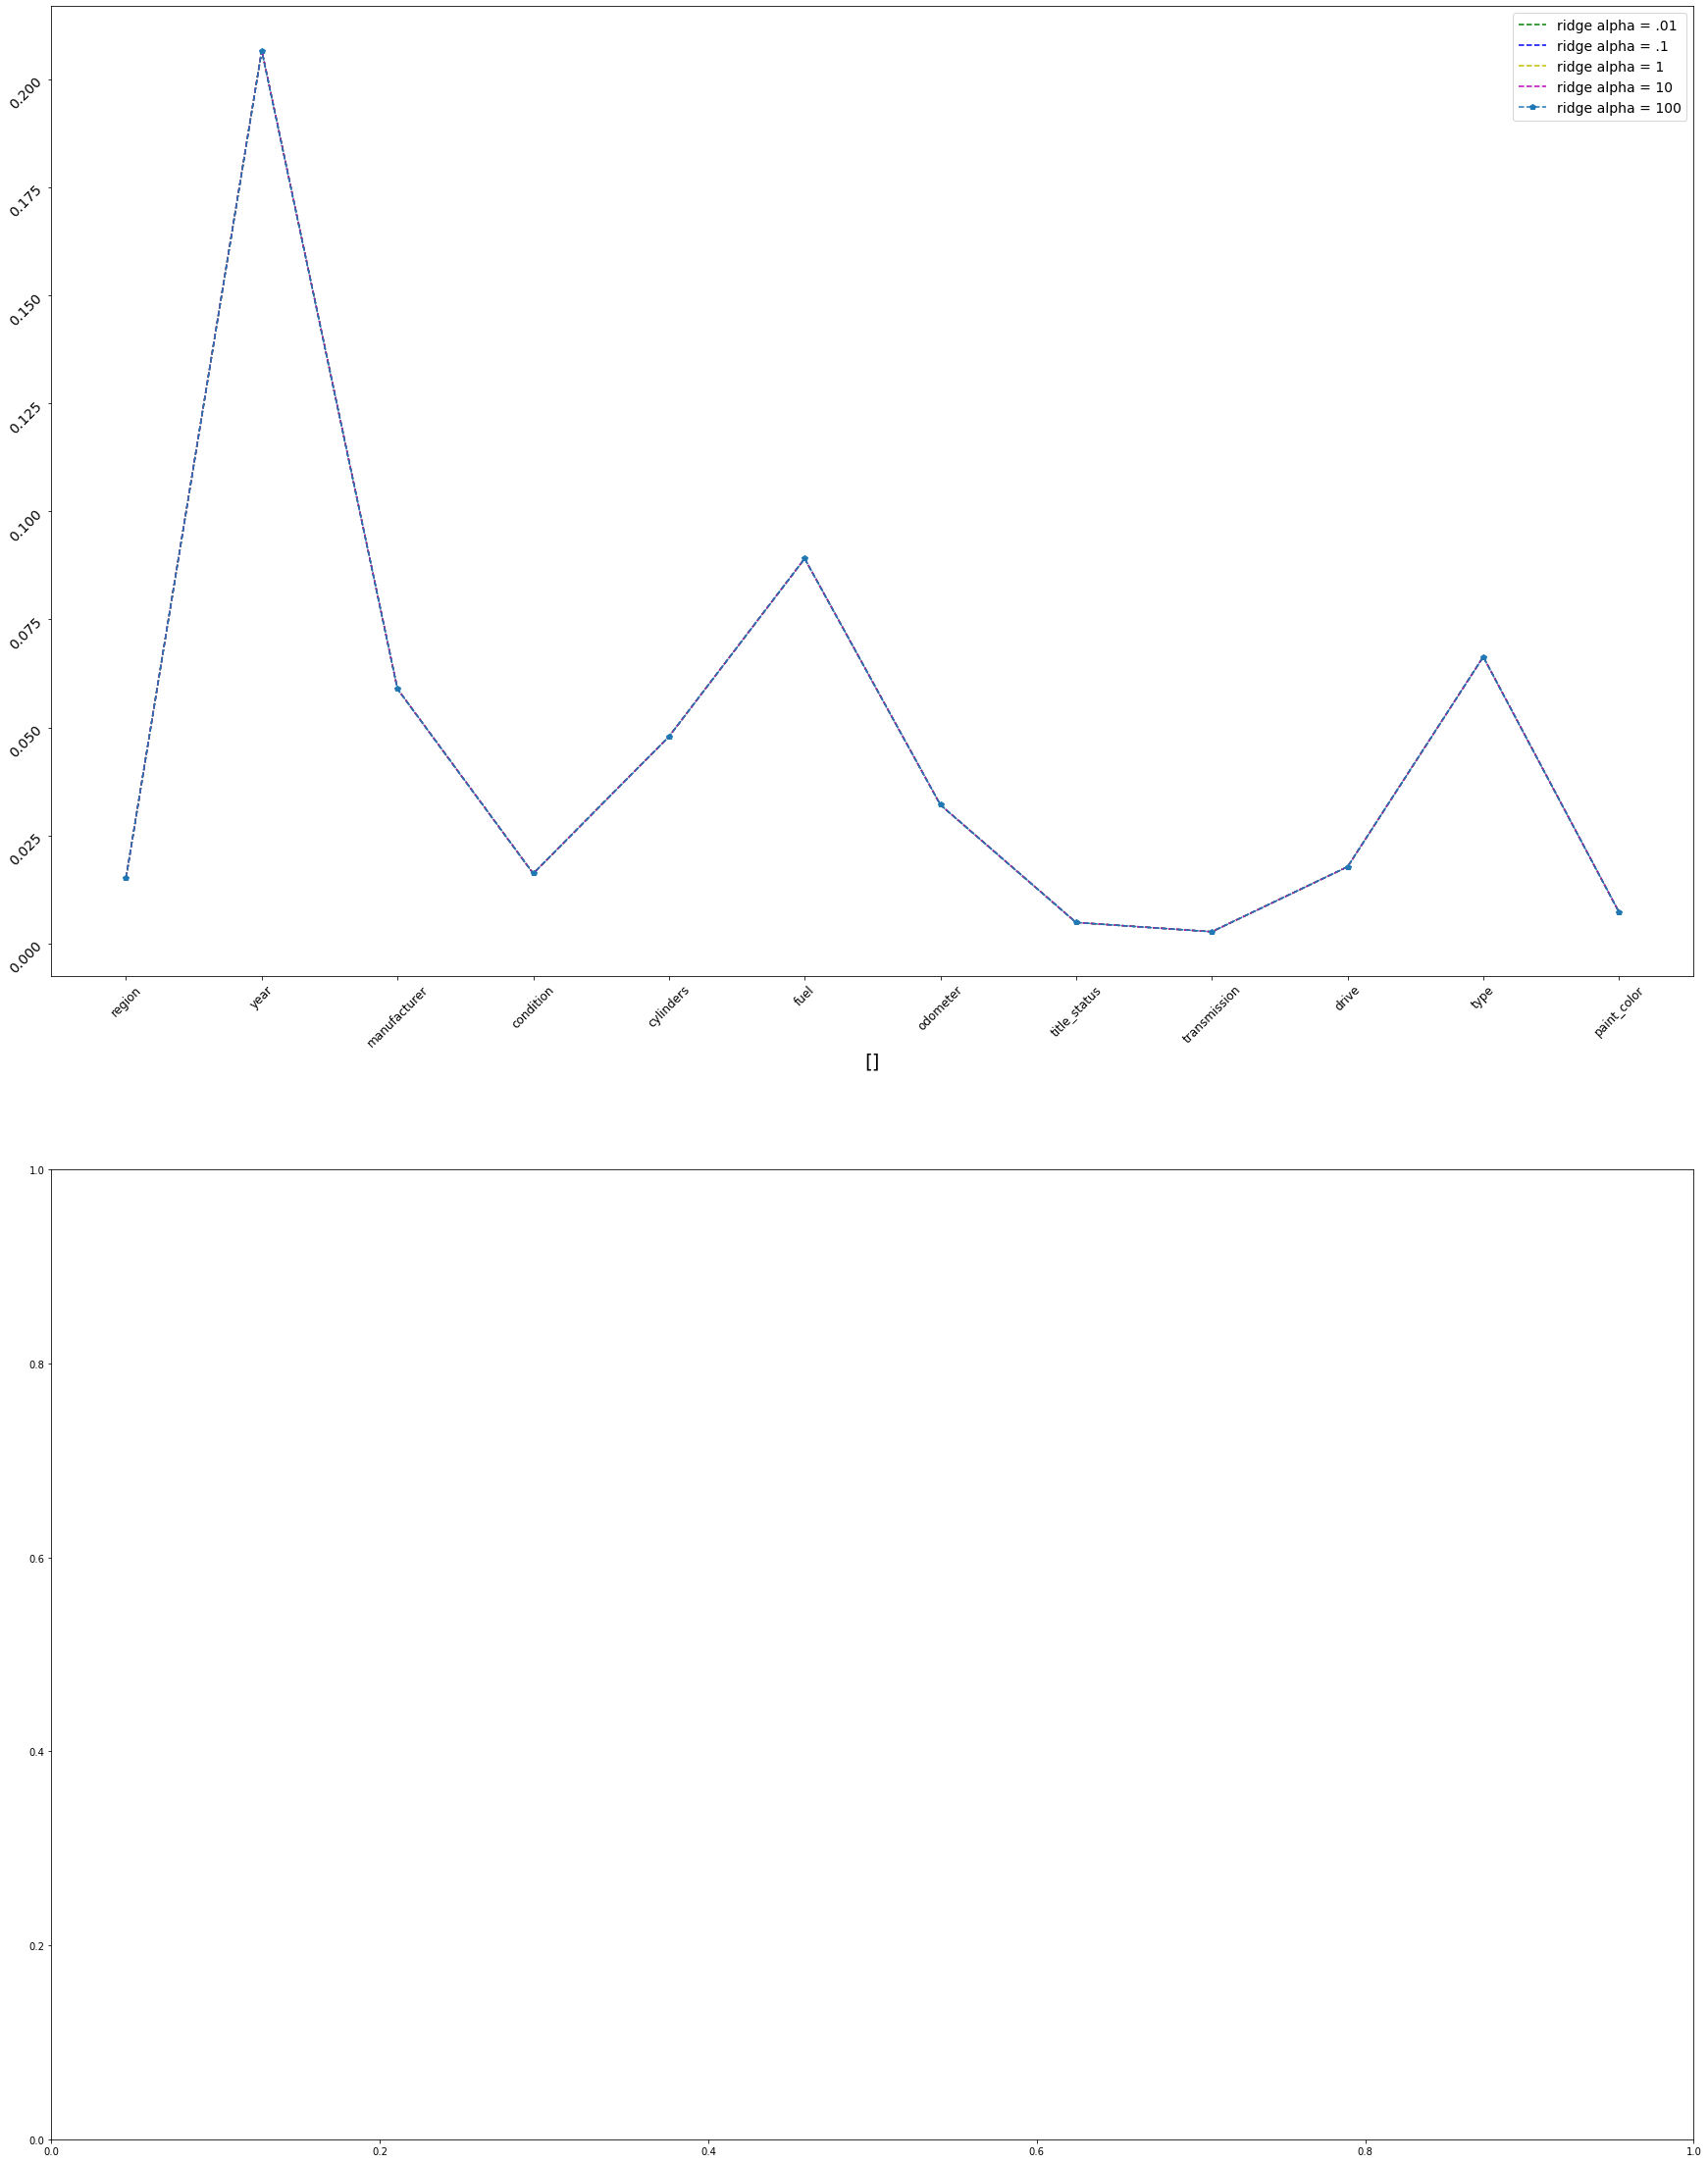

In [271]:
fig, ax = plt.subplots(2, 1, figsize = (30, 40))
ax[0].plot(alpha_df['feature'], alpha_df['coef_for_alpha_0.01'], '--g', label = 'ridge alpha = .01')
ax[0].plot(alpha_df['feature'], alpha_df['coef_for_alpha_0.1'], '--b', label = 'ridge alpha = .1')
ax[0].plot(alpha_df['feature'], alpha_df['coef_for_alpha_1'], '--y', label = 'ridge alpha = 1')
ax[0].plot(alpha_df['feature'], alpha_df['coef_for_alpha_10'], '--m', label = 'ridge alpha = 10')
ax[0].plot(alpha_df['feature'], alpha_df['coef_for_alpha_100'], '--p', label = 'ridge alpha = 100')
ax[0].set_xlabel([], fontsize = 20) # X label
plt.setp(ax[0].get_xticklabels(), fontsize=12)
plt.setp(ax[0].get_yticklabels(), fontsize=14)
ax[0].tick_params(labelrotation=45)
ax[0].legend(fontsize=14);

In [272]:
print(X.columns)
print(train_mses_ridge)
print(test_mses_ridge)

Index(['region', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color'],
      dtype='object')
[135824744.05983534, 135824744.05984944, 135824744.06127173, 135824744.2034483, 135824758.4051221]
[156190345.9489356, 156190345.19910553, 156190337.70211247, 156190262.86268148, 156189527.50273928]


### Single alpha

In [348]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [349]:
train_mses_ridge=[]
test_mses_ridge=[]
importances_mean_ridge = []

#Creating list of aphas to run Ridge regression
alphas = [.01,.1,1,10,100]
data = {'feature':list(X.columns)}

features = list(X.select_dtypes(include=['object']).columns)
features
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

In [350]:
pipe = Pipeline([
('transformer', ohe_step),    
('scale',StandardScaler(with_mean=False)), 
('reg', Ridge(alpha = .01))])
model = pipe.fit(X_train, y_train)

In [351]:
ridge_ohe_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
ridge_ohe_test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print('train_mse=',ridge_ohe_train_mse,' test_mse=',ridge_ohe_test_mse)

train_mse= 163525638.69562232  test_mse= 183979123.87182614


In [397]:
model_comp['train_mse'].append('{:.2f}'.format(float(ridge_ohe_train_mse)))
model_comp['test_mse'].append('{:.2f}'.format(float(ridge_ohe_test_mse)))

In [352]:
ridge_ohe_r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 123)
print('importance:', ridge_ohe_r.importances_mean)

importance: [0.01680081 0.06236629 0.04671694 0.0187845  0.08794946 0.02963567
 0.06015413 0.01878166]


In [398]:
df = pd.DataFrame({"Feature":X.columns, "Score":ridge_ohe_r.importances_mean}).sort_values(by = "Score", ascending = False)
display(df)
ridge_ohe_feature_list = df.loc[df.index[:5]]['Feature'].tolist()
ridge_ohe_score_list = df.loc[df.index[:5]]['Score'].tolist()
model_comp['top_features_1'].append(ridge_ohe_feature_list[0])
model_comp['top_features_2'].append(ridge_ohe_feature_list[1])
model_comp['top_features_3'].append(ridge_ohe_feature_list[2])
model_comp['top_features_4'].append(ridge_ohe_feature_list[3])
model_comp['top_features_5'].append(ridge_ohe_feature_list[4])
model_comp['top_features_score_1'].append(ridge_ohe_score_list[0])
model_comp['top_features_score_2'].append(ridge_ohe_score_list[1])
model_comp['top_features_score_3'].append(ridge_ohe_score_list[2])
model_comp['top_features_score_4'].append(ridge_ohe_score_list[3])
model_comp['top_features_score_5'].append(ridge_ohe_score_list[4])
model_comp

,Feature,Score
4,fuel,0.087949
1,manufacturer,0.062366
6,type,0.060154
2,condition,0.046717
5,drive,0.029636
3,cylinders,0.018785
7,paint_color,0.018782
0,region,0.016801


{'model': ['ridge_ohe', 'ridge_ohe_gcv', 'linreg_ohe', 'bay_ohe', 'rf_ohe'],
 'train_mse': ['163525638.70'],
 'test_mse': ['183979123.87'],
 'top_features_1': ['fuel'],
 'top_features_score_1': [0.08794945686966837],
 'top_features_2': ['manufacturer'],
 'top_features_score_2': [0.06236629427019965],
 'top_features_3': ['type'],
 'top_features_score_3': [0.06015412765133016],
 'top_features_4': ['condition'],
 'top_features_score_4': [0.046716942516177584],
 'top_features_5': ['drive'],
 'top_features_score_5': [0.029635665057376172]}

## Grid Search Cross Validation with Ridge Regression and OHE (Iteration 1)

In [312]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [313]:
alphas = [.01,.1,1,10,100]

features = list(X.select_dtypes(include=['object']).columns)
 # make_column_transformer((OneHotEncoder(drop = 'if_binary'), features))
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

In [314]:
ridge_pipeline = Pipeline([
    ('transformer', ohe_step),
    ('scale',StandardScaler(with_mean=False)), 
    ('ridge', Ridge(alpha = .01))])

parameters_to_try = {'ridge__alpha': alphas} 

In [315]:
selector_grid = GridSearchCV(estimator=ridge_pipeline,
                            param_grid = parameters_to_try)
selector_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['region',
                                                                          'manufacturer',
                                                                          'condition',
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                        

In [316]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['ridge']
print(best_selector)

Ridge(alpha=0.01)


In [317]:
r = permutation_importance(selector_grid, X_test, y_test, n_repeats = 10, random_state = 123)
print('importance:', r.importances_mean)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

importance: [0.0151608  0.20674298 0.05891691 0.01619038 0.04788434 0.08909371
 0.03209362 0.00485518 0.00271614 0.01774837 0.06635689 0.00723776]


,Variable,Score
1,year,0.206743
5,fuel,0.089094
10,type,0.066357
2,manufacturer,0.058917
4,cylinders,0.047884
6,odometer,0.032094
9,drive,0.017748
3,condition,0.016190
0,region,0.015161
11,paint_color,0.007238


## Dropping columns based on above output

In [318]:
df_model = df_model.drop(['odometer','year','transmission','title_status'], axis = 1)

In [319]:
df_model.to_csv('data/vehicles_model.csv')

In [320]:
df_model.head()

,region,price,manufacturer,condition,cylinders,fuel,drive,type,paint_color
0,South,15000,ford,excellent,6_cylinders,gas,2wd,truck,black
1,South,35000,toyota,excellent,6_cylinders,gas,4wd,truck,grey
2,South,19900,ford,good,8_cylinders,diesel,4wd,pickup,blue
3,South,14000,honda,excellent,6_cylinders,gas,2wd,mini-van,silver
4,South,22500,ford,good,8_cylinders,diesel,2wd,truck,white


In [321]:
df_model = pd.read_csv('data/vehicles_model.csv')
del df_model['Unnamed: 0']
df_model.head()

,region,price,manufacturer,condition,cylinders,fuel,drive,type,paint_color
0,South,15000,ford,excellent,6_cylinders,gas,2wd,truck,black
1,South,35000,toyota,excellent,6_cylinders,gas,4wd,truck,grey
2,South,19900,ford,good,8_cylinders,diesel,4wd,pickup,blue
3,South,14000,honda,excellent,6_cylinders,gas,2wd,mini-van,silver
4,South,22500,ford,good,8_cylinders,diesel,2wd,truck,white


## Grid Search Cross Validation with Ridge Regression and OHE (Iteration 2)

In [353]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [354]:
alphas = [.01,.1,1,10,100]

features = list(X.select_dtypes(include=['object']).columns)
 # make_column_transformer((OneHotEncoder(drop = 'if_binary'), features))
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

In [355]:
pipe = Pipeline([
    ('transformer', ohe_step),
    ('scale',StandardScaler(with_mean=False)), 
    ('reg', Ridge(alpha = .01))])

parameters_to_try = {'reg__alpha': alphas} 

In [356]:
selector_grid = GridSearchCV(estimator=pipe,
                            param_grid = parameters_to_try)
model = selector_grid.fit(X_train, y_train)

In [357]:
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['reg']
print(best_selector)

Ridge(alpha=0.01)


In [358]:
ridge_ohe_gcv_train_mse = mean_squared_error(y_train, model.predict(X_train))
ridge_ohe_gcv_test_mse = mean_squared_error(y_test, model.predict(X_test))
print('train_mse=',ridge_ohe_gcv_train_mse,' test_mse=',ridge_ohe_gcv_test_mse)


train_mse= 163525638.69562232  test_mse= 183979123.87182614


In [399]:
model_comp['train_mse'].append('{:.2f}'.format(float(ridge_ohe_train_mse)))
model_comp['test_mse'].append('{:.2f}'.format(float(ridge_ohe_test_mse)))

In [359]:
ridge_ohe_gcv_r = permutation_importance(selector_grid, X_test, y_test, n_repeats = 10, random_state = 123)
print('importance:', r.importances_mean)


importance: [0.0151608  0.20674298 0.05891691 0.01619038 0.04788434 0.08909371
 0.03209362 0.00485518 0.00271614 0.01774837 0.06635689 0.00723776]


In [400]:
df = pd.DataFrame({"Feature":X.columns, "Score":ridge_ohe_gcv_r.importances_mean}).sort_values(by = "Score", ascending = False)
display(df)
ridge_ohe_gcv_feature_list = df.loc[df.index[:5]]['Feature'].tolist()
ridge_ohe_gcv_score_list = df.loc[df.index[:5]]['Score'].tolist()
model_comp['top_features_1'].append(ridge_ohe_gcv_feature_list[0])
model_comp['top_features_2'].append(ridge_ohe_gcv_feature_list[1])
model_comp['top_features_3'].append(ridge_ohe_gcv_feature_list[2])
model_comp['top_features_4'].append(ridge_ohe_gcv_feature_list[3])
model_comp['top_features_5'].append(ridge_ohe_gcv_feature_list[4])
model_comp['top_features_score_1'].append(ridge_ohe_gcv_score_list[0])
model_comp['top_features_score_2'].append(ridge_ohe_gcv_score_list[1])
model_comp['top_features_score_3'].append(ridge_ohe_gcv_score_list[2])
model_comp['top_features_score_4'].append(ridge_ohe_gcv_score_list[3])
model_comp['top_features_score_5'].append(ridge_ohe_gcv_score_list[4])
model_comp

,Feature,Score
4,fuel,0.087949
1,manufacturer,0.062366
6,type,0.060154
2,condition,0.046717
5,drive,0.029636
3,cylinders,0.018785
7,paint_color,0.018782
0,region,0.016801


{'model': ['ridge_ohe', 'ridge_ohe_gcv', 'linreg_ohe', 'bay_ohe', 'rf_ohe'],
 'train_mse': ['163525638.70', '163525638.70'],
 'test_mse': ['183979123.87', '183979123.87'],
 'top_features_1': ['fuel', 'fuel'],
 'top_features_score_1': [0.08794945686966837, 0.08794945686966837],
 'top_features_2': ['manufacturer', 'manufacturer'],
 'top_features_score_2': [0.06236629427019965, 0.06236629427019965],
 'top_features_3': ['type', 'type'],
 'top_features_score_3': [0.06015412765133016, 0.06015412765133016],
 'top_features_4': ['condition', 'condition'],
 'top_features_score_4': [0.046716942516177584, 0.046716942516177584],
 'top_features_5': ['drive', 'drive'],
 'top_features_score_5': [0.029635665057376172, 0.029635665057376172]}

## Linear Regression with Polynomial Feature Selection and OHE

In [360]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [361]:
train_mses_ridge=[]
test_mses_ridge=[]
importances_mean_ridge = []

#Creating list of aphas to run Ridge regression
data = {'feature':list(X.columns)}

features = list(X.select_dtypes(include=['object']).columns)
features
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary'), features), remainder="passthrough" )

In [362]:
pipe = Pipeline([
    ('transformer', ohe_step),
    ('quad_features', PolynomialFeatures(degree = 2, include_bias=False)), 
    ('reg', LinearRegression())])

model = pipe.fit(X_train,y_train)

In [363]:
linreg_ohe_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
linreg_ohe_test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print('train_mse=',linreg_ohe_train_mse,' test_mse=',linreg_ohe_test_mse)


train_mse= 136685207.8867154  test_mse= 167489572.52106464


In [401]:
model_comp['train_mse'].append('{:.2f}'.format(float(linreg_ohe_train_mse)))
model_comp['test_mse'].append('{:.2f}'.format(float(linreg_ohe_test_mse)))

In [339]:
linreg_ohe_r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 123)
print(linreg_ohe_r.importances_mean)


[0.02869954 0.29245919 0.07569728 0.09801163 0.08401074 0.05727435
 0.21140225 0.05334693]


In [402]:
# importances_mean_ridge.append(r.importances_mean)
# data['coef_for_alpha_'+str(alpha)] = r.importances_mean
df = pd.DataFrame({"Feature":X.columns, "Score":linreg_ohe_r.importances_mean}).sort_values(by = "Score", ascending = False)
display(df)
linreg_ohe_feature_list = df.loc[df.index[:5]]['Feature'].tolist()
linreg_ohe_score_list = df.loc[df.index[:5]]['Score'].tolist()
model_comp['top_features_1'].append(linreg_ohe_feature_list[0])
model_comp['top_features_2'].append(linreg_ohe_feature_list[1])
model_comp['top_features_3'].append(linreg_ohe_feature_list[2])
model_comp['top_features_4'].append(linreg_ohe_feature_list[3])
model_comp['top_features_5'].append(linreg_ohe_feature_list[4])
model_comp['top_features_score_1'].append(linreg_ohe_score_list[0])
model_comp['top_features_score_2'].append(linreg_ohe_score_list[1])
model_comp['top_features_score_3'].append(linreg_ohe_score_list[2])
model_comp['top_features_score_4'].append(linreg_ohe_score_list[3])
model_comp['top_features_score_5'].append(linreg_ohe_score_list[4])
model_comp

,Feature,Score
1,manufacturer,0.292459
6,type,0.211402
3,cylinders,0.098012
4,fuel,0.084011
2,condition,0.075697
5,drive,0.057274
7,paint_color,0.053347
0,region,0.028700


{'model': ['ridge_ohe', 'ridge_ohe_gcv', 'linreg_ohe', 'bay_ohe', 'rf_ohe'],
 'train_mse': ['163525638.70', '163525638.70', '136685207.89'],
 'test_mse': ['183979123.87', '183979123.87', '167489572.52'],
 'top_features_1': ['fuel', 'fuel', 'manufacturer'],
 'top_features_score_1': [0.08794945686966837,
  0.08794945686966837,
  0.29245918906779095],
 'top_features_2': ['manufacturer', 'manufacturer', 'type'],
 'top_features_score_2': [0.06236629427019965,
  0.06236629427019965,
  0.21140224915491396],
 'top_features_3': ['type', 'type', 'cylinders'],
 'top_features_score_3': [0.06015412765133016,
  0.06015412765133016,
  0.09801163192685224],
 'top_features_4': ['condition', 'condition', 'fuel'],
 'top_features_score_4': [0.046716942516177584,
  0.046716942516177584,
  0.08401073969809925],
 'top_features_5': ['drive', 'drive', 'condition'],
 'top_features_score_5': [0.029635665057376172,
  0.029635665057376172,
  0.07569728027922275]}

## Bayesian Regression with OHE

In [342]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [343]:
train_mses_ridge=[]
test_mses_ridge=[]
importances_mean_ridge = []

#Creating list of aphas to run Ridge regression
data = {'feature':list(X.columns)}

features = list(X.select_dtypes(include=['object']).columns)
features
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary', sparse=False), features), remainder="passthrough" )

In [344]:
pipe = Pipeline([
    ('transformer', ohe_step),
    ('scale',StandardScaler(with_mean=False)),
    ('reg', BayesianRidge())])
model = pipe.fit(X_train,y_train)

In [345]:
bay_ohe_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
bay_ohe_test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print('train_mse=',bay_ohe_train_mse,' test_mse=',bay_ohe_test_mse)


train_mse= 163525707.1404481  test_mse= 183975092.75686082


In [403]:
model_comp['train_mse'].append('{:.2f}'.format(float(bay_ohe_train_mse)))
model_comp['test_mse'].append('{:.2f}'.format(float(bay_ohe_test_mse)))

In [346]:
bay_ohe_r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 123)
print(bay_ohe_r.importances_mean)

[0.01679316 0.06234348 0.04663655 0.01879939 0.08784163 0.02954001
 0.06008951 0.01875384]


In [404]:
# importances_mean_ridge.append(r.importances_mean)
# data['coef_for_alpha_'+str(alpha)] = r.importances_mean
df = pd.DataFrame({"Feature":X.columns, "Score":bay_ohe_r.importances_mean}).sort_values(by = "Score", ascending = False)
display(df)
bay_ohe_feature_list = df.loc[df.index[:5]]['Feature'].tolist()
bay_ohe_score_list = df.loc[df.index[:5]]['Score'].tolist()
model_comp['top_features_1'].append(bay_ohe_feature_list[0])
model_comp['top_features_2'].append(bay_ohe_feature_list[1])
model_comp['top_features_3'].append(bay_ohe_feature_list[2])
model_comp['top_features_4'].append(bay_ohe_feature_list[3])
model_comp['top_features_5'].append(bay_ohe_feature_list[4])
model_comp['top_features_score_1'].append(bay_ohe_score_list[0])
model_comp['top_features_score_2'].append(bay_ohe_score_list[1])
model_comp['top_features_score_3'].append(bay_ohe_score_list[2])
model_comp['top_features_score_4'].append(bay_ohe_score_list[3])
model_comp['top_features_score_5'].append(bay_ohe_score_list[4])
model_comp

,Feature,Score
4,fuel,0.087842
1,manufacturer,0.062343
6,type,0.060090
2,condition,0.046637
5,drive,0.029540
3,cylinders,0.018799
7,paint_color,0.018754
0,region,0.016793


{'model': ['ridge_ohe', 'ridge_ohe_gcv', 'linreg_ohe', 'bay_ohe', 'rf_ohe'],
 'train_mse': ['163525638.70', '163525638.70', '136685207.89', '163525707.14'],
 'test_mse': ['183979123.87', '183979123.87', '167489572.52', '183975092.76'],
 'top_features_1': ['fuel', 'fuel', 'manufacturer', 'fuel'],
 'top_features_score_1': [0.08794945686966837,
  0.08794945686966837,
  0.29245918906779095,
  0.08784162541049507],
 'top_features_2': ['manufacturer', 'manufacturer', 'type', 'manufacturer'],
 'top_features_score_2': [0.06236629427019965,
  0.06236629427019965,
  0.21140224915491396,
  0.06234348138826042],
 'top_features_3': ['type', 'type', 'cylinders', 'type'],
 'top_features_score_3': [0.06015412765133016,
  0.06015412765133016,
  0.09801163192685224,
  0.06008950947706758],
 'top_features_4': ['condition', 'condition', 'fuel', 'condition'],
 'top_features_score_4': [0.046716942516177584,
  0.046716942516177584,
  0.08401073969809925,
  0.04663654775624089],
 'top_features_5': ['drive', '

## Random Forest Regression with OHE

In [366]:
X = df_model.drop(columns = "price")
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [367]:
train_mses_ridge=[]
test_mses_ridge=[]
importances_mean_ridge = []

#Creating list of aphas to run Ridge regression
data = {'feature':list(X.columns)}

features = list(X.select_dtypes(include=['object']).columns)
features
ohe_step = make_column_transformer((OneHotEncoder(drop = 'if_binary', sparse=False), features), remainder="passthrough" )

In [368]:
pipe = Pipeline([
    ('transformer', ohe_step),
    ('scale',StandardScaler(with_mean=False)),
    ('reg', RandomForestRegressor())])
model = pipe.fit(X_train,y_train)

In [369]:
rf_ohe_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
rf_ohe_test_mse = mean_squared_error(y_test, pipe.predict(X_test))
print('train_mse=',rf_ohe_train_mse,' test_mse=',rf_ohe_test_mse)


train_mse= 89091320.221446  test_mse= 148682657.46689034


In [405]:
model_comp['train_mse'].append('{:.2f}'.format(float(bay_ohe_train_mse)))
model_comp['test_mse'].append('{:.2f}'.format(float(bay_ohe_test_mse)))

In [370]:
rf_ohe_r = permutation_importance(model, X_test, y_test, n_repeats = 10, random_state = 123)
print(rf_ohe_r.importances_mean)


[0.13743127 0.30342517 0.20974919 0.21206661 0.11661019 0.19319084
 0.28253126 0.15825452]


In [406]:
df = pd.DataFrame({"Feature":X.columns, "Score":rf_ohe_r.importances_mean}).sort_values(by = "Score", ascending = False)
display(df)
rf_ohe_feature_list = df.loc[df.index[:5]]['Feature'].tolist()
rf_ohe_score_list = df.loc[df.index[:5]]['Score'].tolist()
model_comp['top_features_1'].append(rf_ohe_feature_list[0])
model_comp['top_features_2'].append(rf_ohe_feature_list[1])
model_comp['top_features_3'].append(rf_ohe_feature_list[2])
model_comp['top_features_4'].append(rf_ohe_feature_list[3])
model_comp['top_features_5'].append(rf_ohe_feature_list[4])
model_comp['top_features_score_1'].append(rf_ohe_score_list[0])
model_comp['top_features_score_2'].append(rf_ohe_score_list[1])
model_comp['top_features_score_3'].append(rf_ohe_score_list[2])
model_comp['top_features_score_4'].append(rf_ohe_score_list[3])
model_comp['top_features_score_5'].append(rf_ohe_score_list[4])
model_comp

,Feature,Score
1,manufacturer,0.303425
6,type,0.282531
3,cylinders,0.212067
2,condition,0.209749
5,drive,0.193191
7,paint_color,0.158255
0,region,0.137431
4,fuel,0.116610


{'model': ['ridge_ohe', 'ridge_ohe_gcv', 'linreg_ohe', 'bay_ohe', 'rf_ohe'],
 'train_mse': ['163525638.70',
  '163525638.70',
  '136685207.89',
  '163525707.14',
  '163525707.14'],
 'test_mse': ['183979123.87',
  '183979123.87',
  '167489572.52',
  '183975092.76',
  '183975092.76'],
 'top_features_1': ['fuel', 'fuel', 'manufacturer', 'fuel', 'manufacturer'],
 'top_features_score_1': [0.08794945686966837,
  0.08794945686966837,
  0.29245918906779095,
  0.08784162541049507,
  0.3034251744109259],
 'top_features_2': ['manufacturer',
  'manufacturer',
  'type',
  'manufacturer',
  'type'],
 'top_features_score_2': [0.06236629427019965,
  0.06236629427019965,
  0.21140224915491396,
  0.06234348138826042,
  0.28253125924567074],
 'top_features_3': ['type', 'type', 'cylinders', 'type', 'cylinders'],
 'top_features_score_3': [0.06015412765133016,
  0.06015412765133016,
  0.09801163192685224,
  0.06008950947706758,
  0.21206660513794998],
 'top_features_4': ['condition',
  'condition',
  'fuel'

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [426]:
df_comparison = pd.DataFrame(model_comp).sort_values(by = "test_mse")
df_comparison

,model,train_mse,test_mse,top_features_1,top_features_score_1,top_features_2,top_features_score_2,top_features_3,top_features_score_3,top_features_4,top_features_score_4,top_features_5,top_features_score_5
2,linreg_ohe,136685207.89,167489572.52,manufacturer,0.292459,type,0.211402,cylinders,0.098012,fuel,0.084011,condition,0.075697
3,bay_ohe,163525707.14,183975092.76,fuel,0.087842,manufacturer,0.062343,type,0.060090,condition,0.046637,drive,0.029540
4,rf_ohe,163525707.14,183975092.76,manufacturer,0.303425,type,0.282531,cylinders,0.212067,condition,0.209749,drive,0.193191
0,ridge_ohe,163525638.70,183979123.87,fuel,0.087949,manufacturer,0.062366,type,0.060154,condition,0.046717,drive,0.029636
1,ridge_ohe_gcv,163525638.70,183979123.87,fuel,0.087949,manufacturer,0.062366,type,0.060154,condition,0.046717,drive,0.029636


In [430]:
df_comparison['model'] = df_comparison['model'].str.replace("linreg_ohe","Linear Regression (One Hot Encoder)")
df_comparison['model'] = df_comparison['model'].str.replace("bay_ohe","Bayesian Regression (One Hot Encoder)")
df_comparison['model'] = df_comparison['model'].str.replace("rf_ohe","RandomForest Regression (One Hot Encoder)")
df_comparison['model'] = df_comparison['model'].str.replace("ridge_ohe","Ridge Regression (One Hot Encoder)")
df_comparison['model'] = df_comparison['model'].str.replace("ridge_ohe_gcv","Ridge Regression CV (One Hot Encoder)")

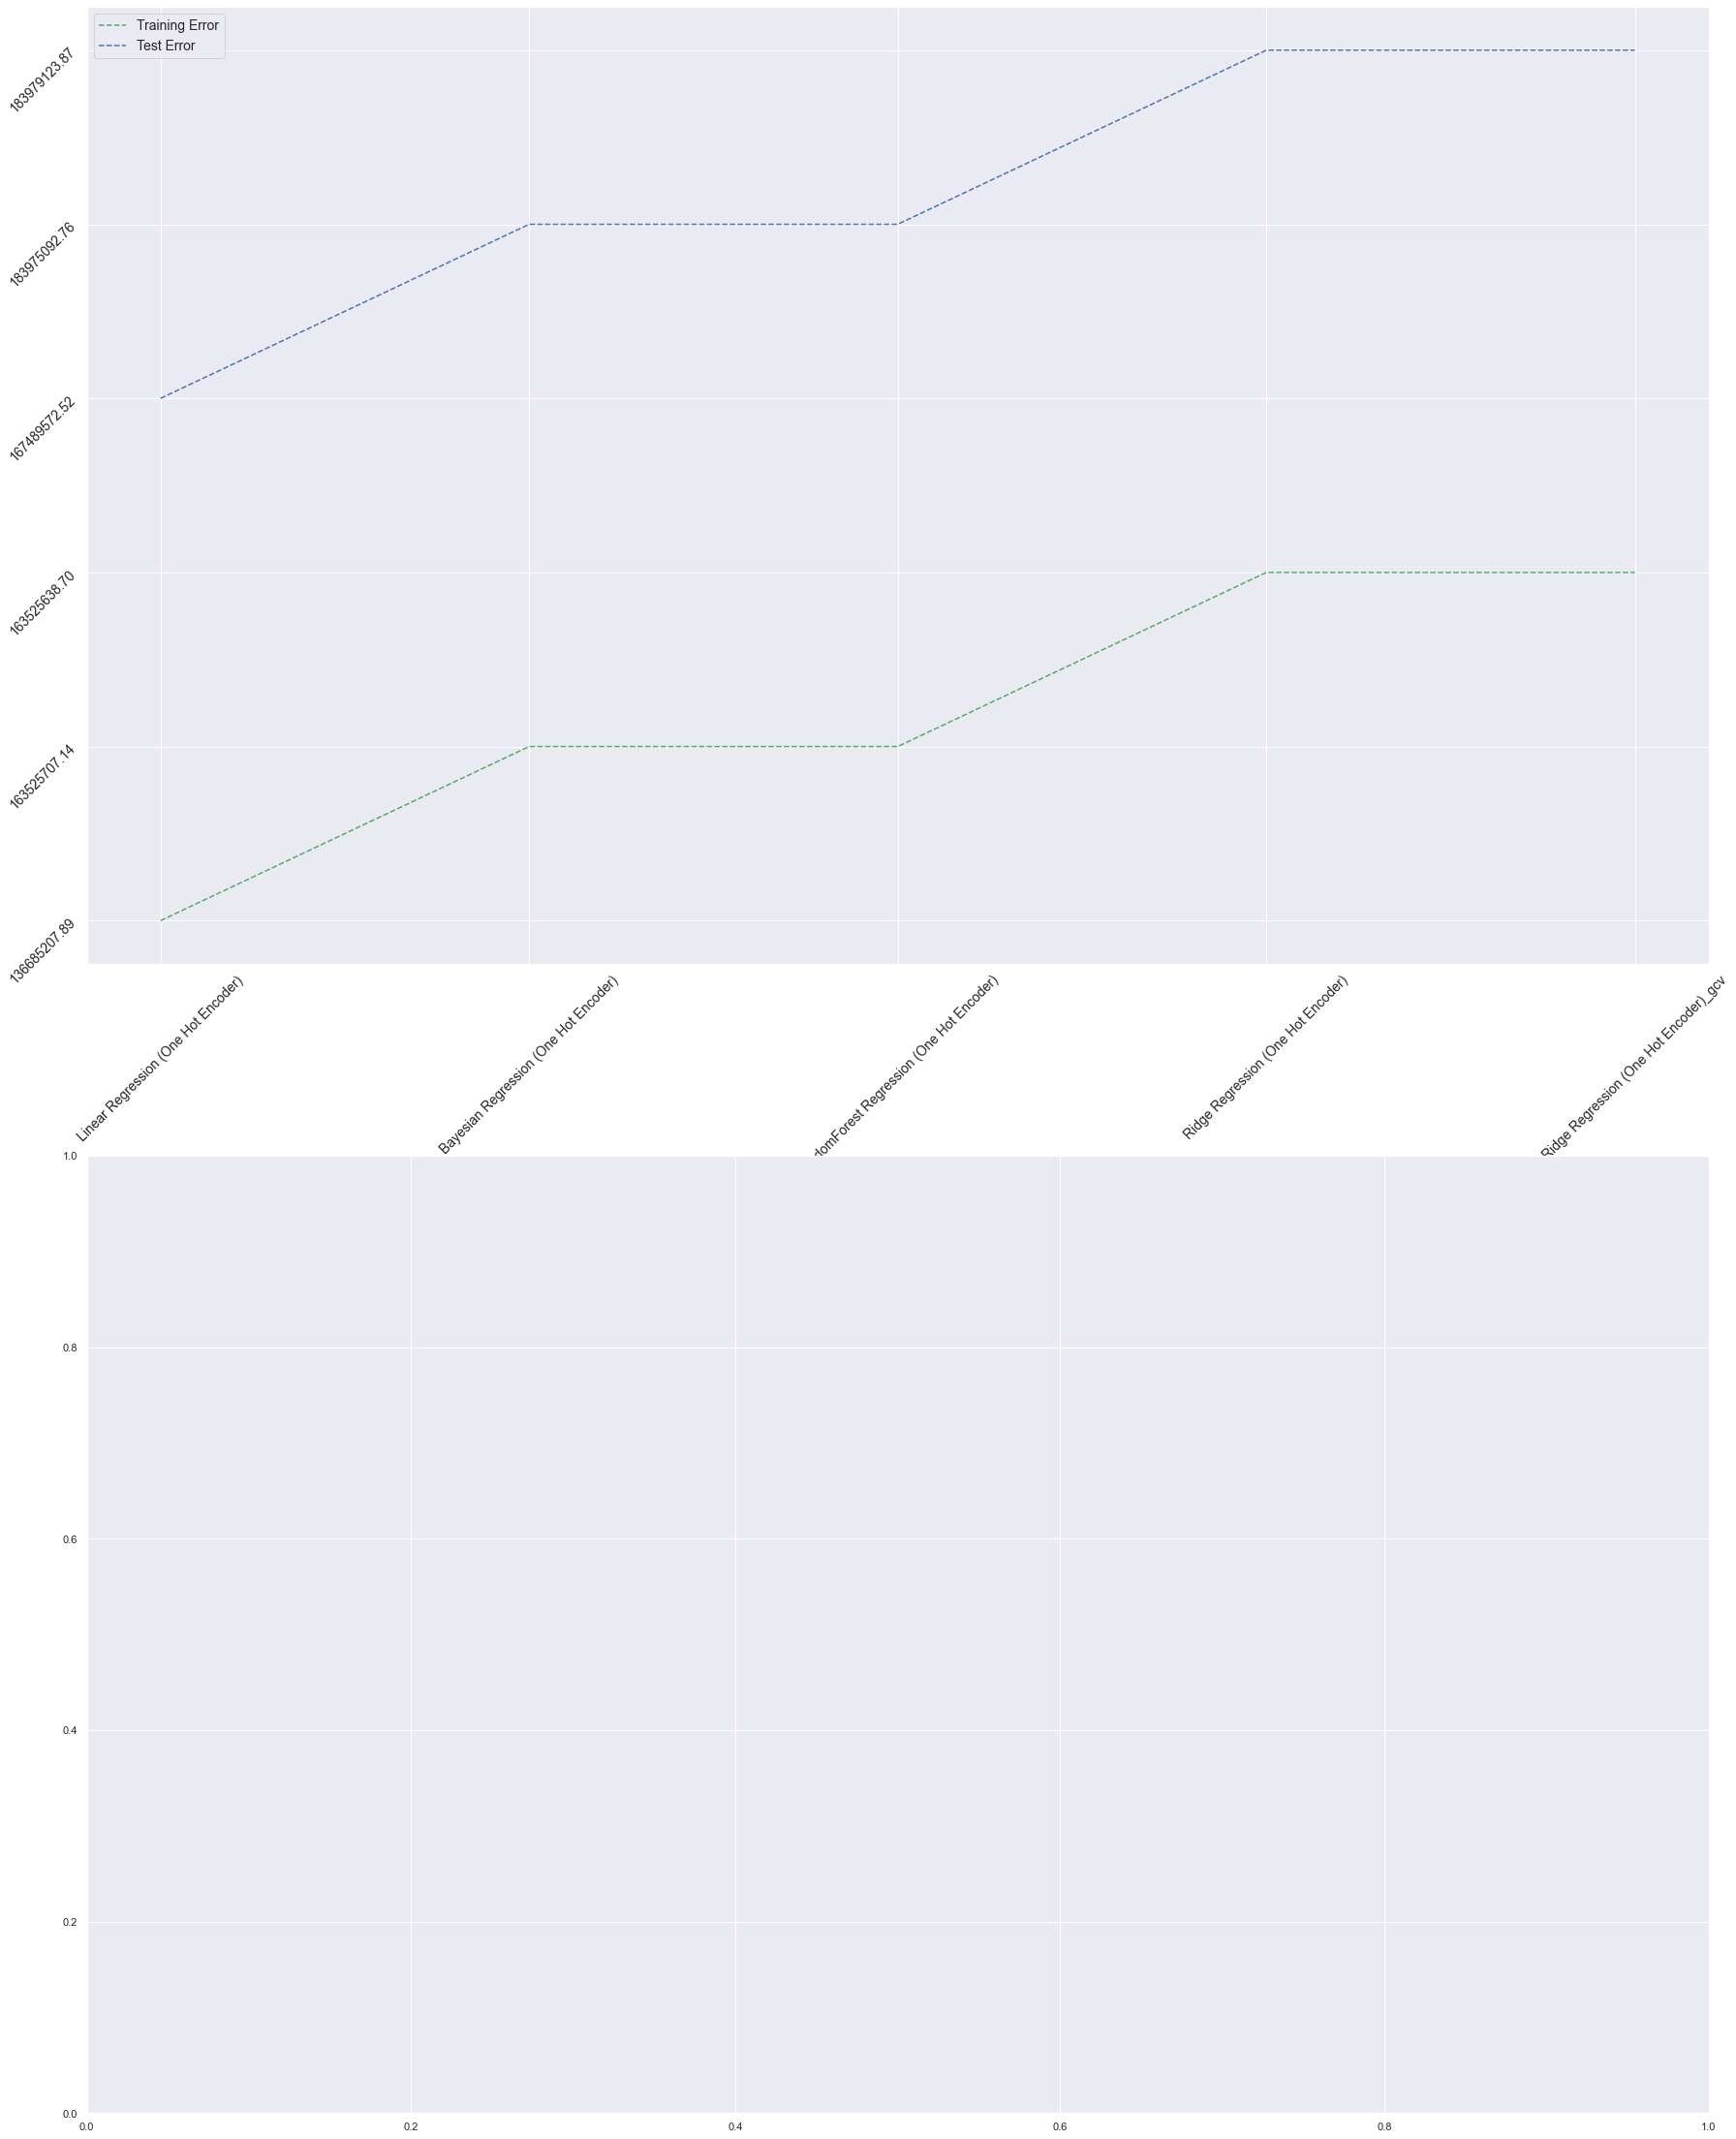

In [431]:
fig, ax = plt.subplots(2, 1, figsize = (30, 40))
ax[0].plot(df_comparison['model'], df_comparison['train_mse'], '--g', label = 'Training Error')
ax[0].plot(df_comparison['model'], df_comparison['test_mse'], '--b', label = 'Test Error')
ax[0].set_xlabel([], fontsize = 20) # X label
plt.setp(ax[0].get_xticklabels(), fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)
ax[0].tick_params(labelrotation=45)
ax[0].legend(fontsize=14);

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Captured in README file